# Cart Abandonment Analysis

##  Data Validation

The dataset contains **7012 rows and 10 columns** before cleaning and validation. I have validated all the columns against the criteria in the dataset table:

- customer_id: unique identifier, no duplicates. No cleaning is needed.
- first_item_added: shown as a timestamp. No cleaning is needed.
- last_item_added: shown as a timestamp. This timestamp is not earlier than the timestamp when the first item wad added. No cleaning is needed.
- discount_applied: either True or False. No cleaning is needed.
- item_category: 15 categories but there are repetitious categories just in different orders. So I combined them into 7 categories.
- number_of_items: Values from 1 to 10. No cleaning is needed.
- total_price: It should be saved as a numerical variable. Remove the dollar sign and convert the data into a number with two decimal places. 231 values are missing. Replace the missing values with the median.
- shipping_region: 343 values are missing. Replace the missing values with 'Unknown'.
- abandoned_checkout: either True or False. No cleaning is needed.
- reason_for_abandonment: 1767 values are missing deliberately because the customer did not abandon the cart. No cleaning is needed.

After the data validation, the dataset contains **7012 rows and 10 columns** without missing values.


In [185]:
import pandas as pd
df = pd.read_csv('data/customer.csv')
df.head()

,customer_id,first_item_added,last_item_added,discount_applied,item_category,number_of_items,total_price,shipping_region,abandoned_checkout,reason_for_abandonment
0,381635,2023-06-25 05:49:18,2023-06-25 05:51:18,False,"Clothing, Accessories",4,$156.11,Latin America,True,Changed Mind
1,799269,2023-06-20 10:43:19,2023-06-20 11:17:19,True,Accessories,2,$96.68,North America,True,Price Comparison
2,37322,2023-06-27 23:41:02,2023-06-28 00:17:02,False,"Clothing, Shoes, Accessories",5,$225.1,Europe,True,Price Comparison
3,164763,2023-06-30 10:42:34,2023-06-30 11:24:34,False,"Accessories, Clothing, Shoes",5,$165.42,NaN,True,Price Comparison
4,392173,2023-06-28 15:27:44,2023-06-28 16:02:44,False,"Accessories, Clothing, Shoes",8,$146.67,North America,False,NaN


In [186]:
df.describe()

,customer_id,number_of_items
count,7012.000000,7012.000000
mean,496060.690388,4.362379
std,287673.238451,1.937557
min,72.000000,1.000000
25%,243402.500000,3.000000
50%,497921.500000,4.000000
75%,741525.000000,6.000000
max,999850.000000,10.000000


In [187]:
df['total_price'] = df['total_price'].str.replace('$','')
df['total_price'] = df['total_price'].astype('float')
df['total_price'] = df['total_price'].fillna(df['total_price'].median())
df['shipping_region'] = df['shipping_region'].fillna('Unknown')
df['item_category'].value_counts()

item_category
Clothing                        1266
Accessories                     1186
Shoes                           1173
Clothing, Shoes, Accessories     298
Shoes, Accessories, Clothing     296
Accessories, Shoes, Clothing     287
Shoes, Clothing                  287
Clothing, Shoes                  287
Accessories, Clothing            285
Shoes, Clothing, Accessories     284
Shoes, Accessories               283
Clothing, Accessories, Shoes     275
Clothing, Accessories            274
Accessories, Clothing, Shoes     267
Accessories, Shoes               264
Name: count, dtype: int64

In [188]:
df['item_category'] = df['item_category'].replace(['Clothing, Accessories, Shoes','Clothing, Accessories, Shoes','Accessories, Clothing, Shoes','Shoes, Accessories, Clothing','Shoes, Clothing, Accessories','Accessories, Shoes, Clothing'],'Clothing, Shoes, Accessories')
df['item_category'] = df['item_category'].replace('Shoes, Clothing', 'Clothing, Shoes')
df['item_category'] = df['item_category'].replace('Accessories, Clothing', 'Clothing, Accessories')
df['item_category'] = df['item_category'].replace('Accessories, Shoes', 'Shoes, Accessories')
df['item_category'].value_counts()

item_category
Clothing, Shoes, Accessories    1707
Clothing                        1266
Accessories                     1186
Shoes                           1173
Clothing, Shoes                  574
Clothing, Accessories            559
Shoes, Accessories               547
Name: count, dtype: int64

## What is the Cart Abandonment Rate in the Last 5 weeks?

The cart abandonment rate is a crucial metric for understanding customer behavior and optimizing the online shopping experience. **Cart Abandonment Rate** is the percentage of users who add items to their cart but do not complete the purchase. 

From the given data, we can calculate the cart abandonment rate in the last 4 weeks. From **Figure 1**, we can see 75.9% of the users who add items to their cart but do not complete the purchase in the last 5 weeks.

Upon examining the weekly cart abandonment rate depicted in **Figure 2**, a notable observation is that the rate experiences a slight decline during Week 3, followed by an overall upward trend.


In [201]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
# Set the plot style to ggplot
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')
# Set the font family to Helvetica
font = {'family': 'Helvetica', 'weight': 'normal'}

plt.rcParams["figure.figsize"] = (8,6)

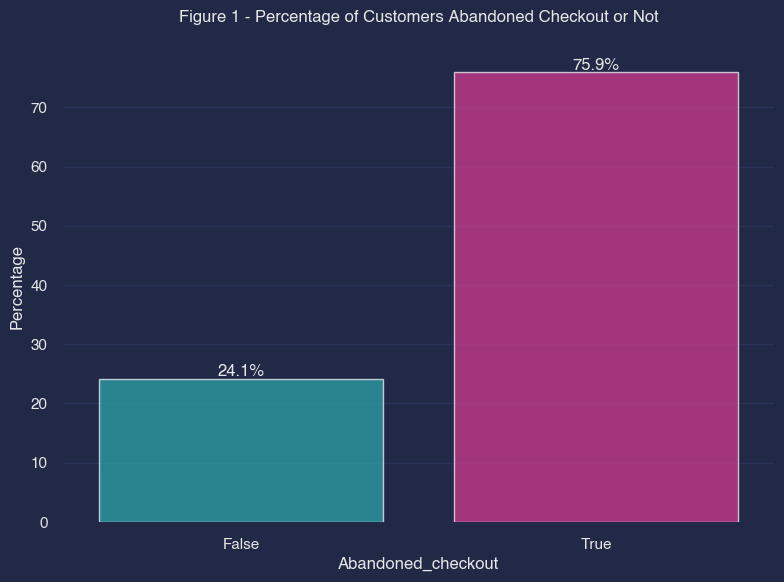

In [249]:
# Plotting the bar chart using Seaborn
category_percentages = df['abandoned_checkout'].value_counts(normalize=True) * 100
ax = sns.barplot(x=category_percentages.index, y=category_percentages, alpha=0.7)
plt.xlabel('Abandoned_checkout')
plt.ylabel('Percentage')
plt.title('Figure 1 - Percentage of Customers Abandoned Checkout or Not', fontweight='bold', pad=20)
# Add percentage labels to the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 0.5, f'{height:.1f}%', ha='center')
    
# Adjust the position and alignment of the title
plt.tight_layout()
plt.subplots_adjust(top=0.9)
ax.title.set_position([0.5, 1.05])

plt.show()

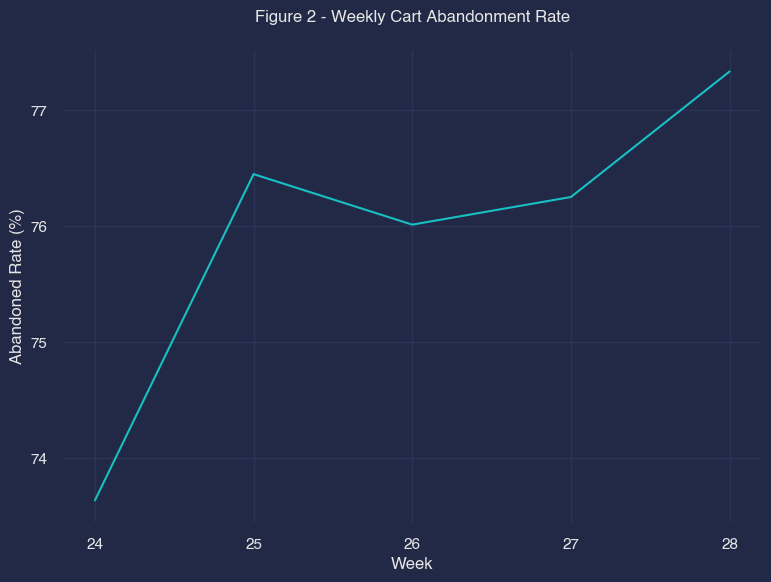

In [248]:
df['last_item_added'] = pd.to_datetime(df['last_item_added'])
df['week'] = df['last_item_added'].dt.isocalendar().week
abandon_rate = df.groupby('week')['abandoned_checkout'].mean() * 100
abandon_rate.plot(kind='line')
plt.xlabel('Week')
plt.ylabel('Abandoned Rate (%)')
plt.title('Figure 2 - Weekly Cart Abandonment Rate', fontweight='bold', pad= 20)
plt.tight_layout()

# Adjust the position and alignment of the title
plt.subplots_adjust(top=0.9)
ax.title.set_position([0.5, 1.05])

# Set the x-axis and y-axis ticks to display integers only
plt.locator_params(axis='x', integer=True)
plt.locator_params(axis='y', integer=True)

plt.show()

## What might be the reasons for the high Cart Abandonment Rate in the Last 5 weeks?

### Reason 1: Price comparison
From **Figure 3**, we can see the most common reason for the cart abandonment rate is the price comparison. In other words, they might not satisfy with the price we are given and decide not to complete the purchase.

However, the data is directly collected from the survey. The survey may not accurately represent the entire population of interest due to selection bias. 

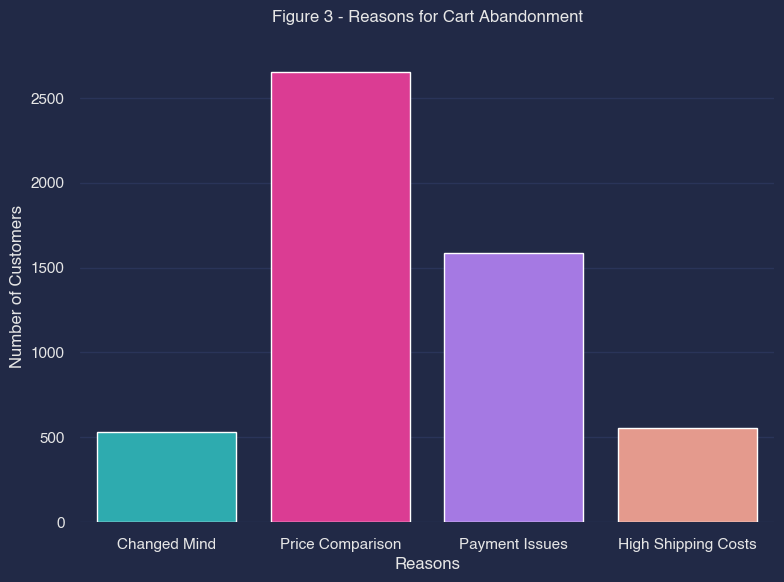

In [264]:
reason_for_abandonment = df[~ df['reason_for_abandonment'].isna()]
ax = sns.countplot(x=reason_for_abandonment['reason_for_abandonment'])
plt.xlabel('Reasons')
plt.ylabel('Number of Customers')
plt.title('Figure 3 - Reasons for Cart Abandonment', fontweight='bold', pad= 20)
plt.tight_layout()


# Adjust the position and alignment of the title
plt.subplots_adjust(top=0.9)
ax.title.set_position([0.5, 1.05])

plt.show()

### Reason 2: Discount Applied or Not
From **Figure 4**, we can observe that customers who did not apply the discount are more likely to abandon checkout. This observation is supported by a follow-up chi-square test, which yielded a very small p-value (3.026613741350446e-52). The small p-value provides strong evidence against the null hypothesis, indicating a significant association between the discount applied and the abandonment of checkout.



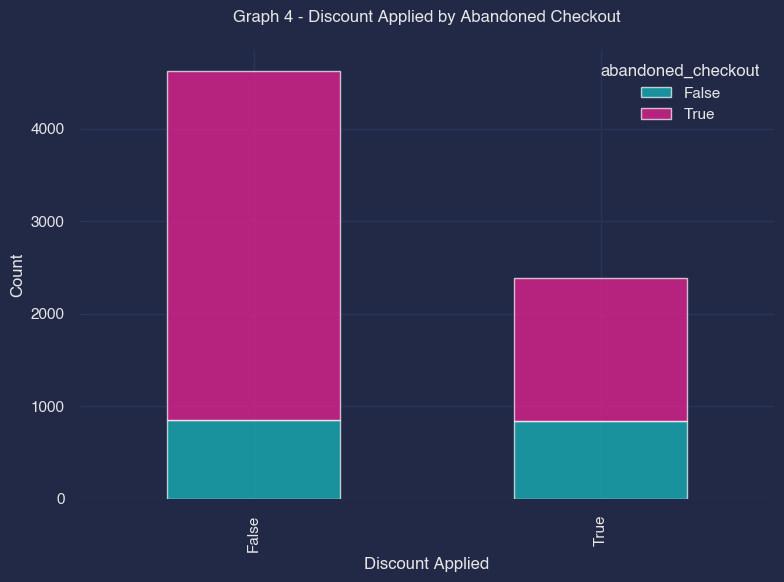

In [225]:
# Plotting the bar chart using Seaborn
pivot_table = pd.pivot_table(data=df, index='discount_applied', columns='abandoned_checkout', aggfunc='size')
ax = pivot_table.plot(kind='bar', stacked=True, alpha=0.7)
plt.xlabel('Discount Applied')
plt.ylabel('Count')
plt.title('Figure 4 - Discount Applied by Abandoned Checkout', fontweight='bold', pad= 20)
plt.tight_layout()

# Adjust the position and alignment of the title
plt.subplots_adjust(top=0.9)
ax.title.set_position([0.5, 1.05])

plt.show()

#### Result of the Chi-Square Test

In [227]:
import scipy.stats as stats

# Create a contingency table
contingency_table = pd.crosstab(df['discount_applied'], df['abandoned_checkout'])

# Chi-Square Test
chi2_stat, p_value, _, _ = stats.chi2_contingency(contingency_table)
print("Chi-Square Test:")
print("Chi-Square Statistic:", chi2_stat)
print("p-value:", p_value)

Chi-Square Test:
Chi-Square Statistic: 231.34989344748874
p-value: 3.026613741350446e-52


### Reason 3: Number of Items
From **Figure 5**, we can observe that customers who have one or more than eight items in their cart never abandoned the checkout in the last 4 weeks. This observation is supported by a follow-up chi-square test, which yielded an extremely small p-value (6.202932305816657e-208) and large chi-square statistics. The result provides strong evidence against the null hypothesis, indicating a significant association between the number of items and the abandonment of checkout.

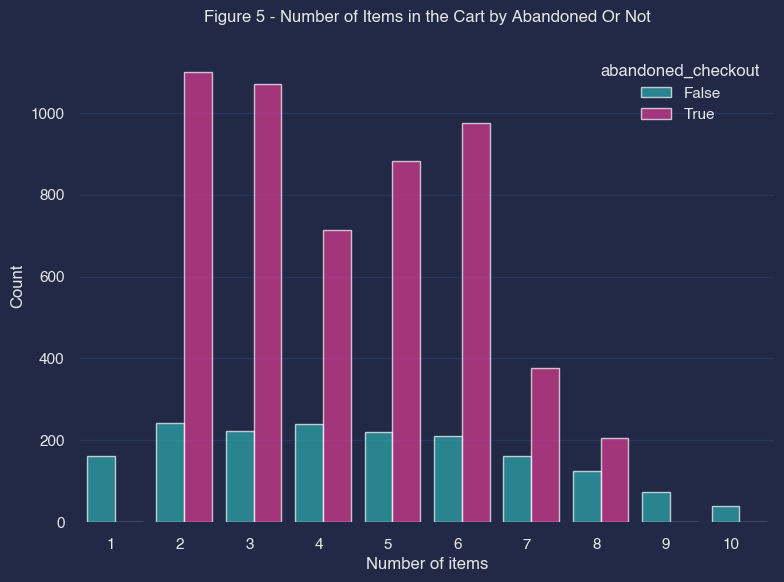

In [246]:
# Plotting the bar chart using Seaborn
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='number_of_items', hue='abandoned_checkout', alpha=0.7)
plt.xlabel('Number of items', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Figure 5 - Number of Items in the Cart by Abandoned Or Not',  fontweight='bold', pad= 20)
plt.xticks(ha='right')
plt.tight_layout()

# Adjust the position and alignment of the title
plt.subplots_adjust(top=0.9)
ax.title.set_position([0.5, 1.05])

plt.show()

#### Result of the Chi-Square Test

In [228]:
# Create a contingency table
contingency_table = pd.crosstab(df['number_of_items'], df['abandoned_checkout'])

# Chi-Square Test
chi2_stat, p_value, _, _ = stats.chi2_contingency(contingency_table)
print("Chi-Square Test:")
print("Chi-Square Statistic:", chi2_stat)
print("p-value:", p_value)

Chi-Square Test:
Chi-Square Statistic: 992.7835627737519
p-value: 6.202932305816657e-208


### Reason 4: Time Spent in Adding Items
From **Figure 6**, we can observe that customers who spent more time adding items to the cart will be more likely to abandon the checkout in the last 4 weeks. This observation is supported by a Wilcoxon rank-sum test, which yielded a very small p-value (1.8049641589940574e-11). The result provides strong evidence against the null hypothesis, indicating a  significant association between the time spent in adding items and the likelihood of customers abandoning checkout.

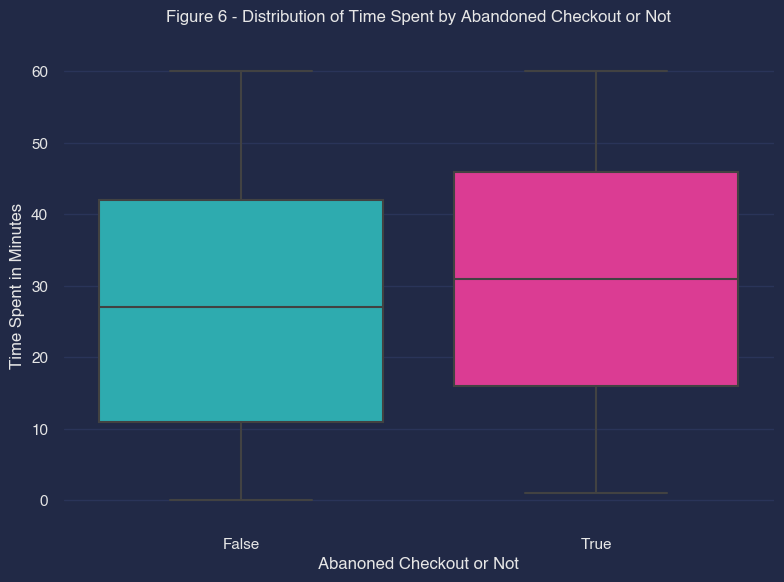

In [251]:
df['time_spent'] = pd.to_datetime(df['last_item_added']) - pd.to_datetime(df['first_item_added'])
df['time_spent'] = df['time_spent'].dt.total_seconds()/ 60

ax = sns.boxplot(data=df, x='abandoned_checkout', y='time_spent')
plt.xlabel('Abanoned Checkout or Not')
plt.ylabel('Time Spent in Minutes')
plt.title('Figure 6 - Distribution of Time Spent by Abandoned Checkout or Not', fontweight='bold', pad= 20)
plt.tight_layout()

# Adjust the position and alignment of the title
plt.subplots_adjust(top=0.9)
ax.title.set_position([0.5, 1.05])

plt.show()

#### Result of the Wilcoxon rank-sum Test

In [252]:
abandoned_time = df.loc[df['abandoned_checkout'] == 1, 'time_spent']
non_abandoned_time = df.loc[df['abandoned_checkout'] == 0, 'time_spent']


# Mann-Whitney U Test
u_stat, p_value = stats.mannwhitneyu(abandoned_time, non_abandoned_time)
print("Wilcoxon rank-sum Test:")
print("Wilcoxon rank-sum Statistic:", u_stat)
print("p-value:", p_value)

Wilcoxon rank-sum Test:
Wilcoxon rank-sum Statistic: 4984299.0
p-value: 1.8049641589940574e-11


### Other Maybe Reason: Item Category
From **Figure 7**, we can observe there are not much association between the item category and whether the customer abandon the checkout or not. This observation is supported by a Chi-Square test. The p-value is above the chosen significant level of 0.05. This suggests that there is insufficient evidence to reject the null hypothesis of independence between the total price and the likelihood of customers abandoning checkout.

However, the p-value is close to the significant level, it may be worth further investigation or conducting additional analyses to explore the relationship between the variables and potentially gather more evidence.

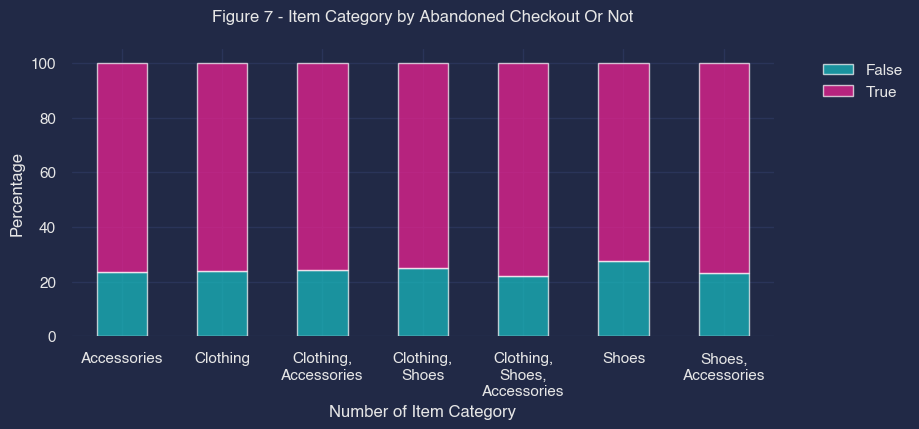

In [325]:
# Calculate the count and percentage of each item category by abandoned checkout
category_counts = df.groupby(['item_category', 'abandoned_checkout']).size().unstack()
category_percentages = category_counts.div(category_counts.sum(axis=1), axis=0) * 100

ax = category_percentages.plot(kind='bar', stacked=True, alpha=0.7)

# Set x-axis and y-axis labels
plt.xlabel('Number of Item Category')
plt.ylabel('Percentage')

# Set plot title
plt.title('Figure 7 - Item Category by Abandoned Checkout Or Not', fontweight='bold', pad=20)

# Adjust spacing
plt.tight_layout()

# Move the legend to the outside of the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels to 0 degrees and manually wrap them
labels = [label.replace(', ', ',\n') for label in category_percentages.index]
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=0)


# Adjust the position and alignment of the title
plt.subplots_adjust(top=0.9)
ax.title.set_position([0.5, 1.05])

# Display the plot
plt.show()

#### Result of the Chi-Square Test

In [312]:
# Create a contingency table
contingency_table = pd.crosstab(df['item_category'], df['abandoned_checkout'])

# Chi-Square Test
chi2_stat, p_value, _, _ = stats.chi2_contingency(contingency_table)
print("Chi-Square Test:")
print("Chi-Square Statistic:", chi2_stat)
print("p-value:", p_value)

Chi-Square Test:
Chi-Square Statistic: 12.155018889600585
p-value: 0.058598538097480245


## Business Metrics

Since our goal is to understand the reasons behind cart abandonment to optimize their conversion rates and improve the user experience, I would recommend we use the following metrics to monitor:
- Abandonment Rate by Discount Applied (Current and Weekly)
- Average Number of Items per Cart by Abandoned or Not (Current and Weekly)
- Average Time Spent in Adding items by Abandoned or Not (Current and Weekly)


#### Metric 1: Abandonment Rate by Discount
Monitor the abandonment rate for both customers who applied a discount and those who did not apply a discount. Compare the abandonment rates between the two groups over time or across different marketing campaigns. This will help assess the effectiveness of offering discounts in reducing cart abandonment.

In [299]:
discount_abandon_rate = df.groupby('discount_applied')['abandoned_checkout'].mean()
# Create a DataFrame from the discount abandonment rate
table = pd.DataFrame({'Discount Applied': discount_abandon_rate.index, 'Abandonment Rate': discount_abandon_rate.values})
table

,Discount Applied,Abandonment Rate
0,False,0.814975
1,True,0.650774


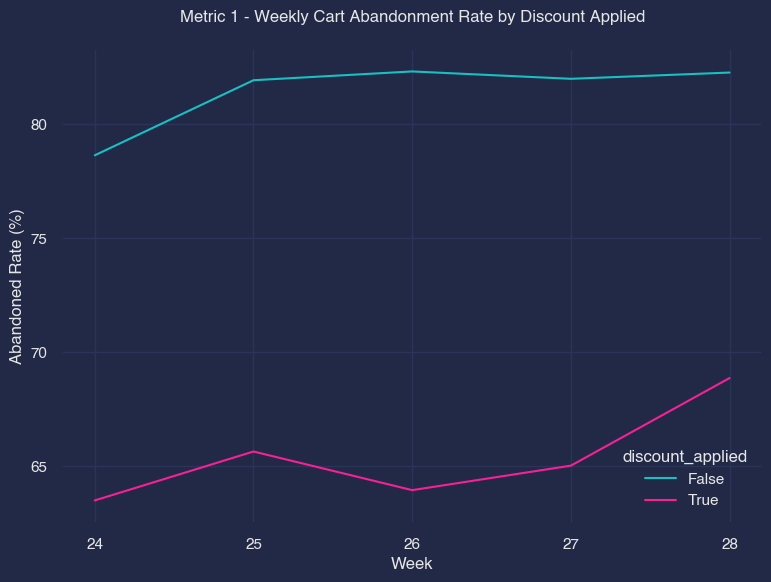

In [277]:
discount_abandon_rate = df.groupby(['week','discount_applied'])['abandoned_checkout'].mean().unstack() * 100
discount_abandon_rate.plot(kind='line')
plt.xlabel('Week')
plt.ylabel('Abandoned Rate (%)')
plt.title('Metric - Weekly Cart Abandonment Rate by Discount Applied', fontweight='bold', pad= 20)
plt.tight_layout()

# Adjust the position and alignment of the title
plt.subplots_adjust(top=0.9)
ax.title.set_position([0.5, 1.05])

# Set the x-axis and y-axis ticks to display integers only
plt.locator_params(axis='x', integer=True)
plt.locator_params(axis='y', integer=True)

plt.show()

#### Metric 2: Average Number of Items per Cart
Track the average number of items added to the cart by customers who abandoned checkout compared to those who completed the purchase. Monitoring this metric can provide insights into whether customers tend to abandon carts with a higher or lower number of items.

In [303]:
item_abandon_rate = df.groupby('abandoned_checkout')['number_of_items'].mean().round(1)
table = pd.DataFrame({'Abandoned Checkout Or Not': item_abandon_rate.index, 'Avearge Number of Items': item_abandon_rate.values})
table

,Abandoned Checkout Or Not,Avearge Number of Items
0,False,4.6
1,True,4.3


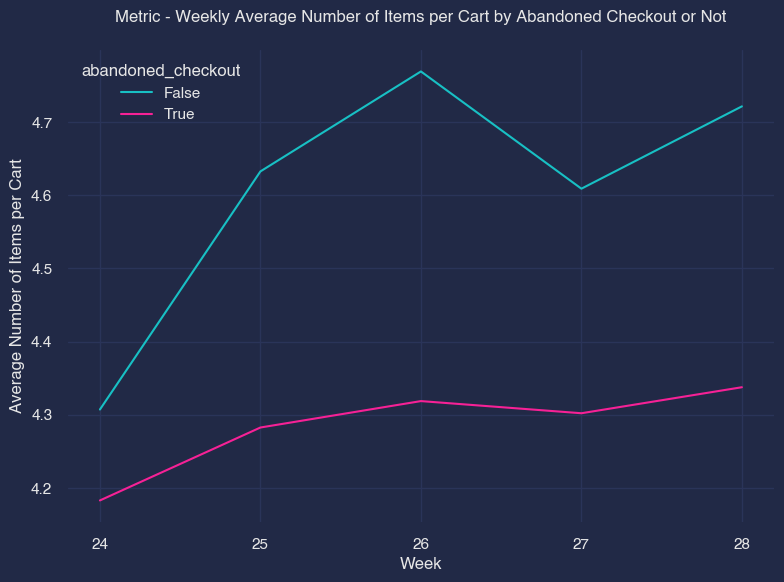

In [297]:
item_abandon_rate = df.groupby(['week','abandoned_checkout'])['number_of_items'].mean().unstack()
item_abandon_rate.plot(kind='line')
plt.xlabel('Week')
plt.ylabel('Average Number of Items per Cart')
plt.title('Metric - Weekly Average Number of Items per Cart by Abandoned Checkout or Not', fontweight='bold', pad= 20)
plt.tight_layout()

# Adjust the position and alignment of the title
plt.subplots_adjust(top=0.9)
ax.title.set_position([0.5, 1.05])

# Set the x-axis and y-axis ticks to display integers only
plt.locator_params(axis='x', integer=True)
plt.locator_params(axis='y', integer=True)

plt.show()

#### Metric 3: Time Spent in Adding Items
Measure the average time customers spend in the cart before abandoning the checkout process. Compare this metric between abandoned and completed orders to identify any significant differences. Monitoring the time spent in adding items can help identify potential friction points or complications in the checkout process.

In [302]:
item_abandon_rate = df.groupby('abandoned_checkout')['time_spent'].mean().round(1)
table = pd.DataFrame({'Abandoned Checkout Or Not': item_abandon_rate.index, 'Avearge Time Spent in Adding Items': item_abandon_rate.values})
table

,Abandoned Checkout Or Not,Avearge Time Spent in Adding Items
0,False,27.2
1,True,30.6


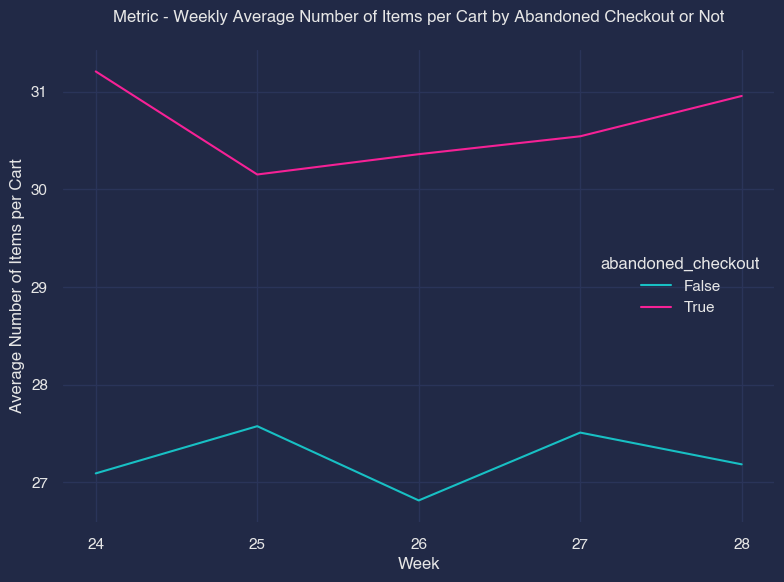

In [308]:
item_abandon_rate = df.groupby(['week','abandoned_checkout'])['time_spent'].mean().unstack()
item_abandon_rate.plot(kind='line')
plt.xlabel('Week')
plt.ylabel('Average Number of Items per Cart')
plt.title('Metric - Weekly Average Number of Items per Cart by Abandoned Checkout or Not', fontweight='bold', pad= 20)
plt.tight_layout()

# Adjust the position and alignment of the title
plt.subplots_adjust(top=0.9)
ax.title.set_position([0.5, 1.05])

# Set the x-axis and y-axis ticks to display integers only
plt.locator_params(axis='x', integer=True)
plt.locator_params(axis='y', integer=True)

plt.show()

## Recommendation
We have identified several factors that may have influenced whether customers abandoned the checkout process. However, further investigation and monitoring of the relevant metrics are needed to confirm the relationship between these factors and cart abandonment.

To address these factors and optimize conversion rates while reducing cart abandonment, we recommend implementing specific optimization strategies:

1. **Optimization Strategy Related to Price**
    - Conduct user interviews to gain deeper insights into why users consider price comparison as a primary reason for abandoning their carts. This qualitative feedback can help identify specific pain points or areas where price-related optimizations can be made.
    - Conduct A/B testing to evaluate the effectiveness of offering discounts in reducing the cart abandonment rate. This will provide empirical evidence on the impact of pricing strategies on customer behavior.

2. **Optimization Strategy Related to Adding Items and Reducing Time Spent**
    - Design and implement a "Buy Together" function on the website. This feature will showcase related items of interest to users during the checkout process, encouraging them to add more items to their carts. By reducing the time spent and making the process more convenient, this strategy aims to improve conversion rates and reduce cart abandonment.
    - Conduct A/B testing to evaluate the effectiveness of this "Buy Together" function in reducing the cart abandonment rate and optimizing the user experience.
